In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import tensorflow as tf
from keras import Sequential
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from sklearn.preprocessing import LabelBinarizer

In [ ]:
train= IDG(rescale=1/255)
validation= IDG(rescale=1/255)
test=IDG(rescale=1/255)

In [ ]:
train_dataset=train.flow_from_directory('/content/drive/MyDrive/PPMI/SN_FINAL_Cropped/Train',
                                        target_size=(650,1000),
                                        batch_size=10,
                                        class_mode='categorical')

Found 400 images belonging to 2 classes.


In [ ]:
validation_dataset=validation.flow_from_directory('/content/drive/MyDrive/PPMI/SN_FINAL_Cropped/Val',
                                        target_size=(650,1000),
                                        batch_size=10,
                                        class_mode='categorical')

Found 80 images belonging to 2 classes.


In [ ]:
# Obtain class labels from the training dataset
class_labels = list(train_dataset.class_indices.keys())
print("Class Labels:", class_labels)

# Get the training set labels
train_labels = train_dataset.classes

# One-hot encode the training set labels
label_binarizer = LabelBinarizer()
one_hot_train_labels = label_binarizer.fit_transform(train_labels)

# Similarly process the validation dataset labels
val_labels = validation_dataset.classes
one_hot_val_labels = label_binarizer.transform(val_labels)

# Confirm the shapes of the one-hot encoded labels
print("Shape of one-hot encoded training labels:", one_hot_train_labels.shape)
print("Shape of one-hot encoded validation labels:", one_hot_val_labels.shape)


Class Labels: ['Control', 'PD']
Shape of one-hot encoded training labels: (400, 1)
Shape of one-hot encoded validation labels: (80, 1)


In [ ]:
train_dataset.class_indices

{'Control': 0, 'PD': 1}

In [ ]:
test_dataset=test.flow_from_directory('/content/drive/MyDrive/PPMI/SN_FINAL_Cropped/Test',
                                        target_size=(650,1000),
                                        batch_size=10,
                                        class_mode='categorical')

Found 20 images belonging to 2 classes.


In [ ]:
test_dataset.class_indices

{'Control': 0, 'PD': 1}

In [ ]:
test_labels = test_dataset.classes

**CUSTOM CNN**

In [ ]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=(650, 1000, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    #
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    #
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    #
    tf.keras.layers.Flatten(),
    #
    tf.keras.layers.Dense(128, activation='relu'),
    #
    tf.keras.layers.Dense(2, activation='softmax')
])
model1.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_109 (Conv2D)         (None, 648, 998, 8)       224       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 324, 499, 8)       0         
 ng2D)                                                           
                                                                 
 conv2d_110 (Conv2D)         (None, 322, 497, 16)      1168      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 161, 248, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_111 (Conv2D)         (None, 159, 246, 32)      4640      
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 79, 123, 32)      

In [ ]:
model1.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
model_fit1=model1.fit(train_dataset,
                    steps_per_epoch=20,
                    epochs=100,
                    validation_data=validation_dataset)

Epoch 1/100
20/20 [==============================] - 16s 697ms/step - loss: 6.2811 - accuracy: 0.5050 - val_loss: 0.6908 - val_accuracy: 0.5500
Epoch 2/100
20/20 [==============================] - 11s 579ms/step - loss: 0.6718 - accuracy: 0.6050 - val_loss: 0.6592 - val_accuracy: 0.5750
Epoch 3/100
20/20 [==============================] - 13s 675ms/step - loss: 0.5541 - accuracy: 0.7250 - val_loss: 0.5511 - val_accuracy: 0.6750
Epoch 4/100
20/20 [==============================] - 13s 658ms/step - loss: 0.4553 - accuracy: 0.7350 - val_loss: 0.4941 - val_accuracy: 0.7500
Epoch 5/100
20/20 [==============================] - 11s 532ms/step - loss: 0.3061 - accuracy: 0.8950 - val_loss: 0.4931 - val_accuracy: 0.7250
Epoch 6/100
20/20 [==============================] - 11s 570ms/step - loss: 0.2283 - accuracy: 0.9200 - val_loss: 0.4309 - val_accuracy: 0.8000
Epoch 7/100
20/20 [==============================] - 11s 569ms/step - loss: 0.1225 - accuracy: 0.9700 - val_loss: 0.9999 - val_accuracy:

In [ ]:
print("Validation Accuracy Custom CNN=", model1.evaluate(validation_dataset)[1])

8/8 [==============================] - 3s 365ms/step - loss: 0.5151 - accuracy: 0.8250
Validation Accuracy Custom CNN= 0.824999988079071


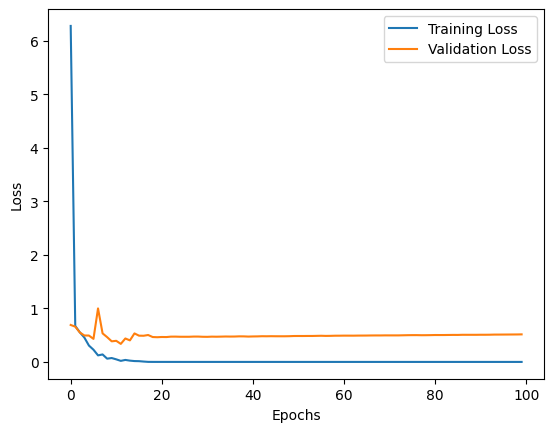

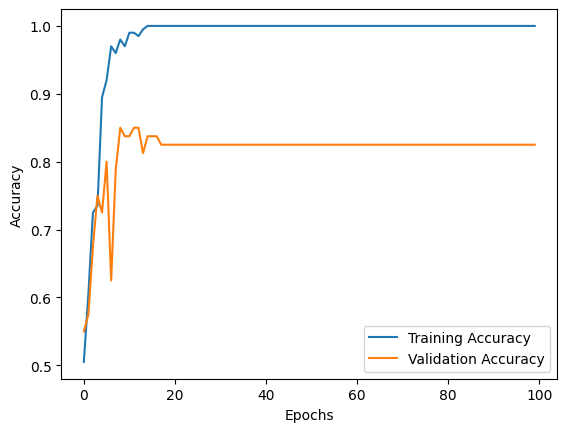

In [ ]:
# Plot training and validation loss over epochs
plt.plot(model_fit1.history['loss'], label='Training Loss')
plt.plot(model_fit1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy over epochs
plt.plot(model_fit1.history['accuracy'], label='Training Accuracy')
plt.plot(model_fit1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#This code will train the model, capture the training history, and then plot both the training and validation loss as well as accuracy over the epochs.


In [ ]:
model1.save('/content/drive/MyDrive/PPMI/FINAL_MODELS/CustomCNN2_SOFT.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


MobileNet

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models

In [ ]:
# Load the pre-trained MobileNet model without the top classification layers
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(650, 1000, 3))

# Add custom classification layers
model2 = models.Sequential()
model2.add(base_model)
model2.add(layers.GlobalAveragePooling2D())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(2, activation='softmax'))

# Freeze the base model layers
base_model.trainable = False

model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 20, 31, 1024)      3228864   
 onal)                                                           
                                                                 
 global_average_pooling2d_2  (None, 1024)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_16 (Dense)            (None, 256)               262400    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 2)                 514       
                                                                 
Total params: 3491778 (13.32 MB)
Trainable params: 262

In [ ]:
# Compile the model
model2.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',  # Use 'categorical_crossentropy' for more than 2 classes
    metrics=['accuracy']
)

In [ ]:
# Train the model
model_fit2 = model2.fit(
    train_dataset,
    steps_per_epoch=20,
    epochs=100,
    validation_data=validation_dataset,
)
print("Validation Accuracy MobileNetV2=", model2.evaluate(validation_dataset)[1])

Epoch 1/100
20/20 [==============================] - 12s 592ms/step - loss: 0.4392 - accuracy: 0.8300 - val_loss: 0.3799 - val_accuracy: 0.9250
Epoch 2/100
20/20 [==============================] - 11s 549ms/step - loss: 0.4334 - accuracy: 0.8200 - val_loss: 0.4144 - val_accuracy: 0.8000
Epoch 3/100
20/20 [==============================] - 12s 587ms/step - loss: 0.4358 - accuracy: 0.8150 - val_loss: 0.3680 - val_accuracy: 0.8750
Epoch 4/100
20/20 [==============================] - 12s 599ms/step - loss: 0.4040 - accuracy: 0.8700 - val_loss: 0.3677 - val_accuracy: 0.9125
Epoch 5/100
20/20 [==============================] - 12s 597ms/step - loss: 0.4331 - accuracy: 0.8100 - val_loss: 0.3860 - val_accuracy: 0.8500
Epoch 6/100
20/20 [==============================] - 11s 552ms/step - loss: 0.4329 - accuracy: 0.8150 - val_loss: 0.3568 - val_accuracy: 0.9250
Epoch 7/100
20/20 [==============================] - 12s 584ms/step - loss: 0.4045 - accuracy: 0.8750 - val_loss: 0.3580 - val_accuracy:

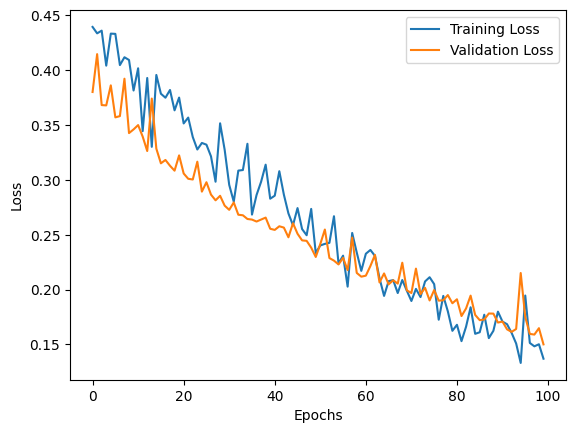

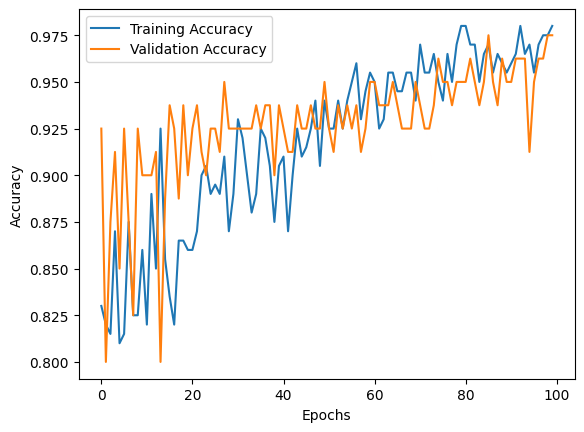

In [ ]:
# Plot training and validation loss over epochs
plt.plot(model_fit2.history['loss'], label='Training Loss')
plt.plot(model_fit2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy over epochs
plt.plot(model_fit2.history['accuracy'], label='Training Accuracy')
plt.plot(model_fit2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#This code will train the model, capture the training history, and then plot both the training and validation loss as well as accuracy over the epochs.


In [ ]:
model2.save('/content/drive/MyDrive/PPMI/FINAL_MODELS/FinalMobileNet2_SOFT.h5')

InceptionNetV3

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import models, layers


In [ ]:
# Load the pre-trained InceptionV3 model without the top classification layers
base_model3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(650, 1000, 3))

# Add custom classification layers
model3 = models.Sequential()
model3.add(base_model3)
model3.add(layers.GlobalAveragePooling2D())
model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(2, activation='softmax'))

# Freeze the base model layers
base_model3.trainable = False

model3.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 18, 29, 2048)      21802784  
                                                                 
 global_average_pooling2d_3  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_18 (Dense)            (None, 256)               524544    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 2)                 514       
                                                                 
Total params: 22327842 (85.17 MB)
Trainable params: 525058 (2.00 MB)
Non-trainable params: 21802784 (83.17 MB)
_________

In [ ]:
# Compile the model
model3.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',  # Use 'categorical_crossentropy' for more than 2 classes
    metrics=['accuracy']
)

In [ ]:
# Train the model
model_fit3 = model3.fit(
    train_dataset,
    steps_per_epoch=20,
    epochs=100,
    validation_data=validation_dataset,
)
print("Validation Accuracy InceptionNetV3=", model3.evaluate(validation_dataset)[1])

Epoch 1/100
20/20 [==============================] - 19s 683ms/step - loss: 0.7111 - accuracy: 0.5400 - val_loss: 0.6699 - val_accuracy: 0.5625
Epoch 2/100
20/20 [==============================] - 14s 673ms/step - loss: 0.7231 - accuracy: 0.5450 - val_loss: 0.6303 - val_accuracy: 0.6000
Epoch 3/100
20/20 [==============================] - 14s 669ms/step - loss: 0.6972 - accuracy: 0.5950 - val_loss: 0.5945 - val_accuracy: 0.7125
Epoch 4/100
20/20 [==============================] - 13s 660ms/step - loss: 0.6868 - accuracy: 0.5950 - val_loss: 0.5794 - val_accuracy: 0.7000
Epoch 5/100
20/20 [==============================] - 12s 605ms/step - loss: 0.6520 - accuracy: 0.5550 - val_loss: 0.5657 - val_accuracy: 0.7125
Epoch 6/100
20/20 [==============================] - 13s 625ms/step - loss: 0.6370 - accuracy: 0.6250 - val_loss: 0.5582 - val_accuracy: 0.7500
Epoch 7/100
20/20 [==============================] - 12s 622ms/step - loss: 0.6490 - accuracy: 0.6250 - val_loss: 0.6220 - val_accuracy:

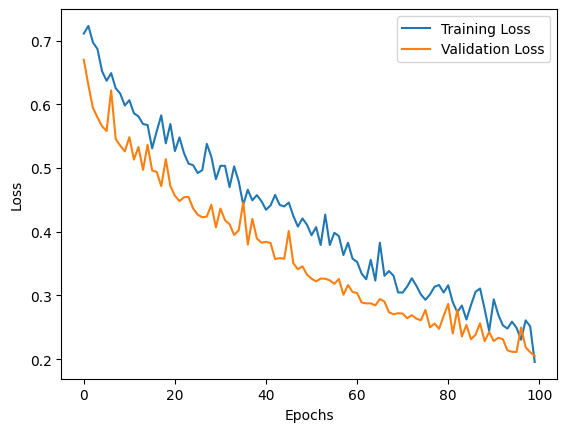

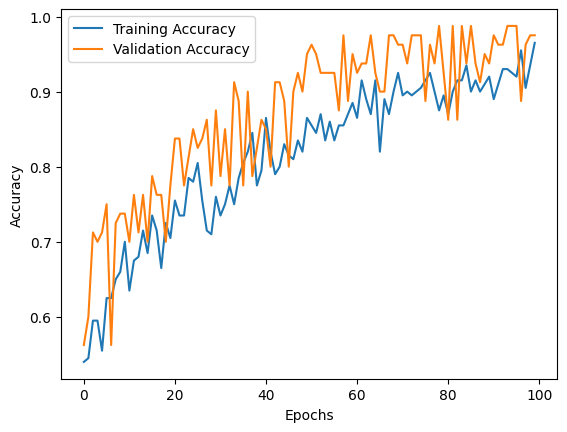

In [ ]:
# Plot training and validation loss over epochs
plt.plot(model_fit3.history['loss'], label='Training Loss')
plt.plot(model_fit3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy over epochs
plt.plot(model_fit3.history['accuracy'], label='Training Accuracy')
plt.plot(model_fit3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
model3.save('/content/drive/MyDrive/PPMI/FINAL_MODELS/InceptionNetV3_SOFT.h5')